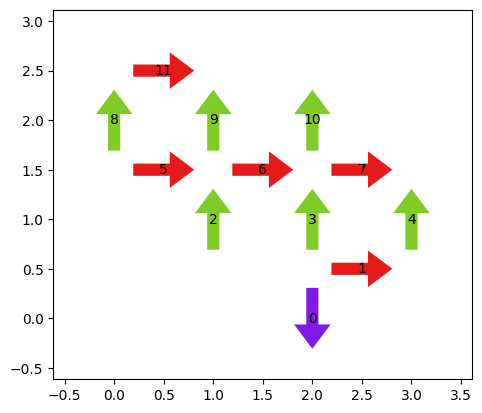

In [17]:
from flatspin import SpinIce
import numpy as np
import matplotlib.pyplot as plt

class aravaNAND(SpinIce):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def _init_geometry(self):

        spin_count = 12
            
        pos = np.zeros((spin_count, 2), dtype=float)
        angle = np.zeros(spin_count, dtype=float)

        labels = []

        a = self.lattice_spacing
        i = 0
        y=0

        for row in range(0, 6):

            if row==0:
                ncols=1
                x=2*a
            elif row==1:
                ncols=1
                x=2.5*a
            elif row==5:
                ncols=1
                x=0.5*a

            elif row==2:
                ncols=3
                x=a
            elif row==3:
                ncols=3
                x=0.5*a
            elif row==4:
                ncols=3
                x=0              

            for col in range(0, ncols):
                if row==0:
                    pos[i] = [x,y]
                    angle[i] = -np.pi/2 #bias
                elif row==1 or row==5:
                    pos[i] = [x,y]
                    angle[i] = 0

                elif row==2:
                    pos[i] = [x,y]
                    angle[i] = np.pi/2
                    if col==0:  #input1
                        angle[i] = np.pi/2                       
                    x+=a
                elif row==3:
                    pos[i] = [x,y]
                    angle[i] = 0
                    '''angle[i] = np.pi
                    if col==1:
                        angle[i] = 0'''                    
                    x+=a
                elif row==4:
                    pos[i] = [x,y]
                    angle[i] = np.pi/2
                    if col==2:  #input2
                        angle[i] = np.pi/2
                    x+=a

                label = (row, col)
                labels.append(label)

                i += 1
            y+=a/2

        self.labels = np.array(labels) 

        return pos, angle
model = aravaNAND()
model.plot()
for i in model.indices():
    plt.text(model.pos[i,0], model.pos[i,1], str(i), ha='center', va='center')



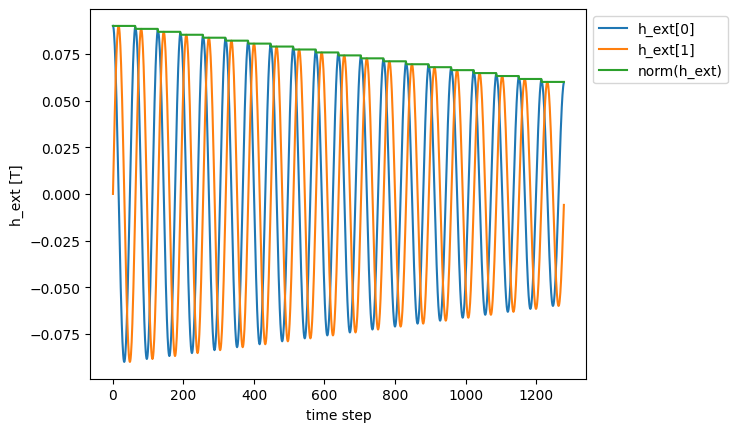

In [3]:
from flatspin.encoder import Rotate

timesteps = 64
enc_rotate = Rotate(H=0.09, H0=0.06, timesteps=timesteps)
input = np.linspace(1, 0, 20)

h_ext = enc_rotate(input)
H = np.linalg.norm(h_ext, axis=1)

plt.plot(h_ext[:,0], label="h_ext[0]")
plt.plot(h_ext[:,1], label="h_ext[1]")
plt.plot(np.linalg.norm(h_ext, axis=1), label="norm(h_ext)")
plt.xlabel("time step")
plt.ylabel("h_ext [T]")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

Completed 211 steps


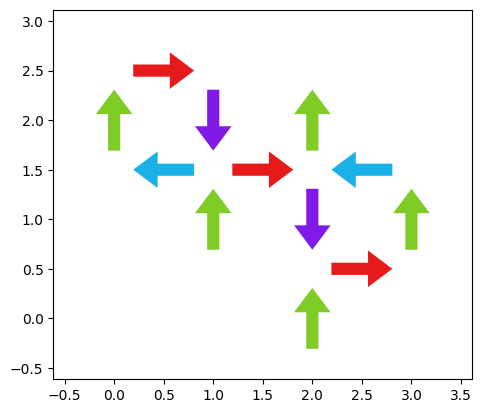

In [18]:
# Record spins, number of spin flips and dipolar energy over time
spins = []
flips = []
E_dip = []
for i, h in enumerate(h_ext):
    model.set_h_ext(h)
    s = model.relax()
    if (i+1) % timesteps == 0:
        # Record spin state at the end of each rotation
        spins.append(model.spin.copy())
    flips.append(s)
    E_dip.append(model.total_dipolar_energy())

model.plot()
print(f"Completed {sum(flips)} steps")